### Machine Learning & Regressions
Sometimes, we think we've measured up well, while the dating partner proves we're wrong.<br>
How accurate is our perception from the partner's side?<br>
How their perception of us affect their willingness for future dates?<br>
Can we predict our partner's willingness based on our own perception of how we behaved?<br>
We will try to apply machine learning to tell the scenarios.

* [How accurate is our perception?](#cor-per)

In [45]:
import pandas as pd
pd.options.display.max_rows = 1000 #for showing truncated results
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, ConfusionMatrixDisplay, confusion_matrix, classification_report, accuracy_score

In [32]:
# importing data
dates = pd.read_csv('./Dataset/Speed Dating Data.csv', encoding="ISO-8859-1") # we are using this encoding due to the format of the dataset. 
dates.head(5)
# include wanted columns
date = pd.concat([dates.iloc[:, 0],dates.iloc[:, 2],dates.iloc[:, 11:30],dates.iloc[:, 30:35],dates.iloc[:, 39:43],dates.iloc[:, 45:67],dates.iloc[:, 69:74],
                      dates.iloc[:, 92:97],dates.iloc[:, 97:102],dates.iloc[:, 104:107]], axis=1)
# deleting null rows
date = date.dropna()
# creating an object-free dataframe
date = date.drop(['field', 'from', 'career'], axis=1)
date = date[date['fun_o'] <= 10]

In [33]:
#participant's partner's final decision for future dates
partner_dec = date['dec_o'] 

# creating a dataframe with the partner's perception of the participant
partner_perception = date[['attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o']] #attractive, sincere, intelligent, fun & ambitious

# creating a dataframe with participant's own feel of partner's perception
own_perception = date[['attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1']]

gender = date[['gender']]

print(partner_dec.head(5))
print(partner_perception.head(5))
print(own_perception.head(5))

3409    0
3413    0
3414    1
3415    0
3418    1
Name: dec_o, dtype: int64
      attr_o  sinc_o  intel_o  fun_o  amb_o
3409     6.0     8.0      9.0    8.0    9.0
3413     5.0     7.0      8.0    6.0    7.0
3414     9.0     9.0      8.0    9.0    7.0
3415     5.0    10.0      6.0    7.0    7.0
3418     9.0     9.0      7.0    8.0    8.0
      attr5_1  sinc5_1  intel5_1  fun5_1  amb5_1
3409      9.0      6.0       9.0     6.0    10.0
3413      9.0      6.0       9.0     6.0    10.0
3414      9.0      6.0       9.0     6.0    10.0
3415      9.0      6.0       9.0     6.0    10.0
3418      6.0      9.0       9.0     9.0     9.0


### <a id="cor-per">How accurate is our perception?</a>
In this part, we will first find out how our accurate our feeling on our partner's perception is, using Linear Regressions.

Linear Regression between participant's and their partner's perception on his/her: attractive


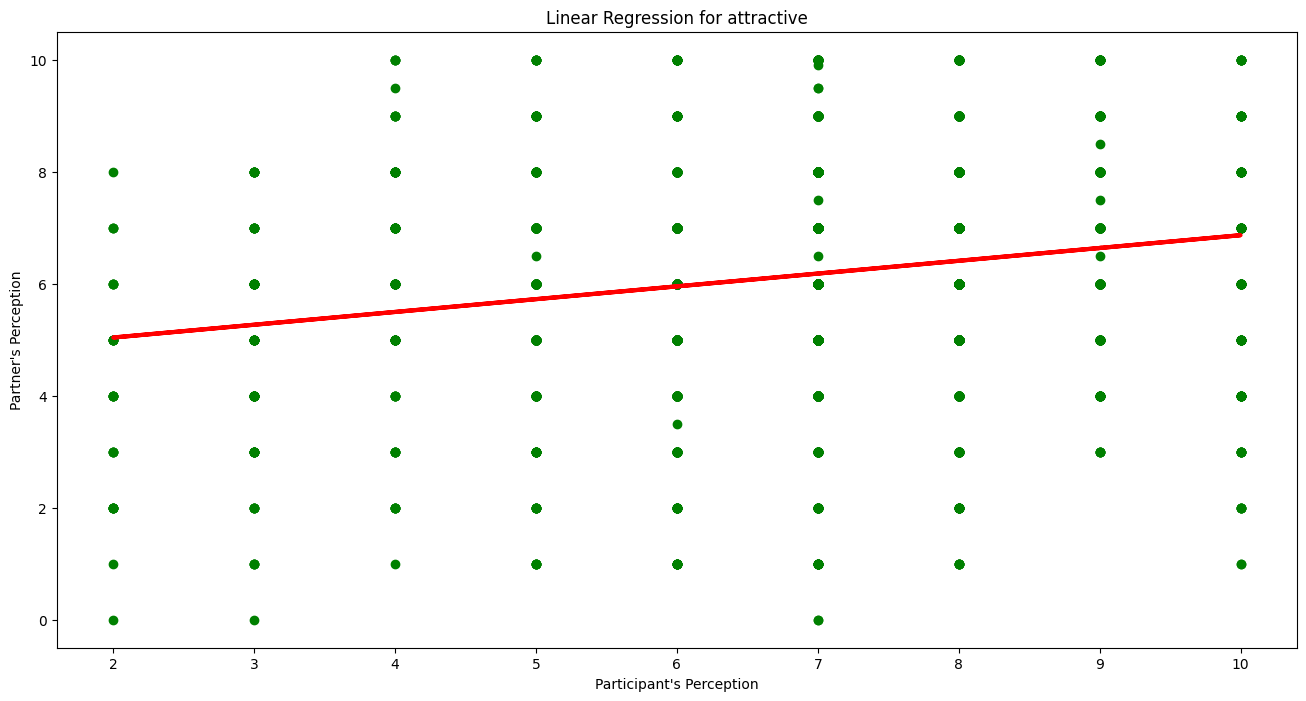

TRAIN SET:
Explained Variance (R^2) 	: 0.03199006062792875
Mean Squared Error (MSE) 	: 1.9517389792643711
Root Mean Squared Error （RMSE) 	: 1.397046520078831
TEST SET:
Explained Variance (R^2) 	: 0.030524930774022074
Mean Squared Error (MSE) 	: 1.8472610753072767
Root Mean Squared Error （RMSE) 	: 1.3591398291961267
Linear Regression between participant's and their partner's perception on his/her: sincere


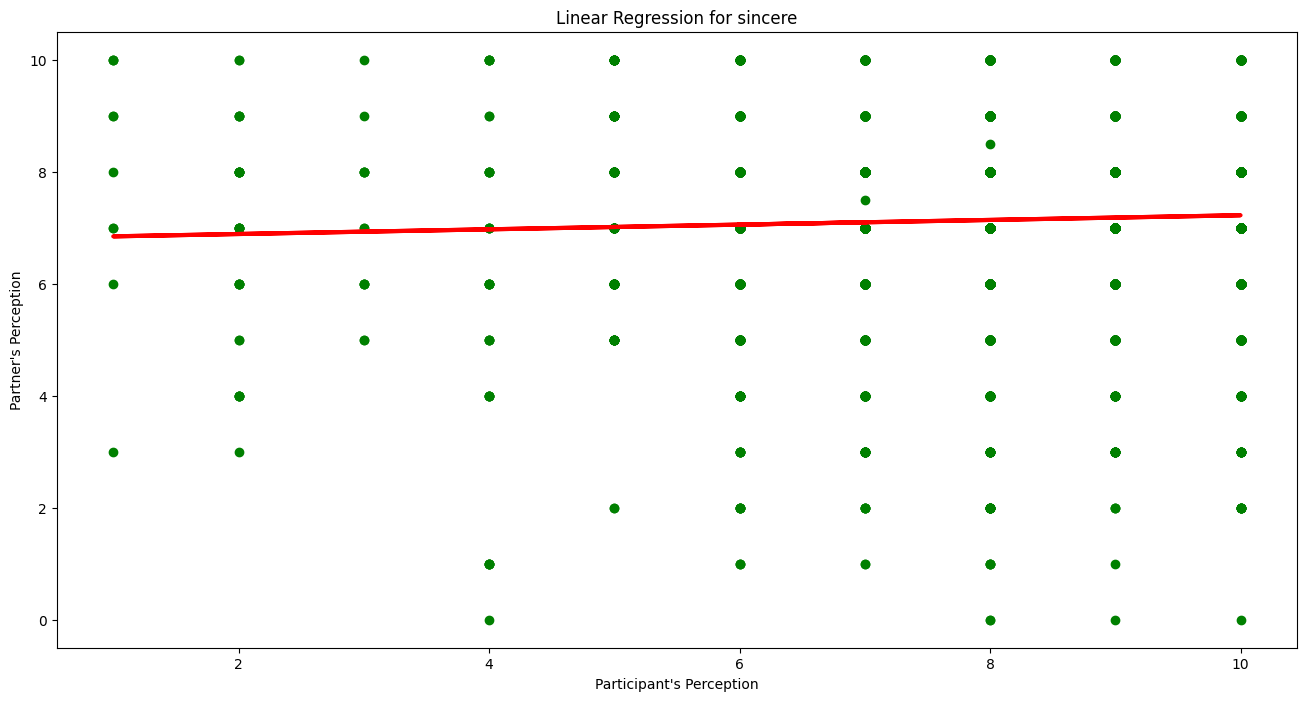

TRAIN SET:
Explained Variance (R^2) 	: 0.0014845530854311617
Mean Squared Error (MSE) 	: 3.098552355456646
Root Mean Squared Error （RMSE) 	: 1.7602705347351146
TEST SET:
Explained Variance (R^2) 	: -0.0017940853316096295
Mean Squared Error (MSE) 	: 3.210835074102594
Root Mean Squared Error （RMSE) 	: 1.7918803180186433
Linear Regression between participant's and their partner's perception on his/her: intelligence


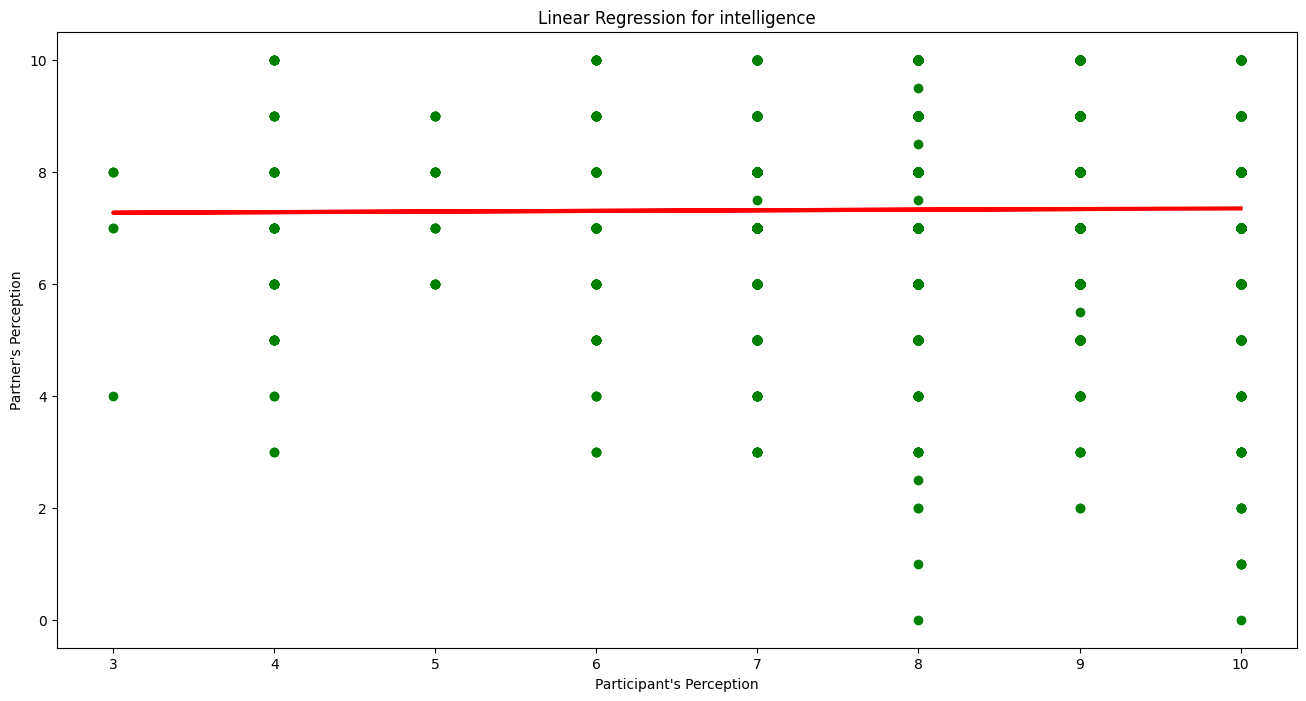

TRAIN SET:
Explained Variance (R^2) 	: 8.542753081630661e-05
Mean Squared Error (MSE) 	: 2.628142041052769
Root Mean Squared Error （RMSE) 	: 1.6211545395343312
TEST SET:
Explained Variance (R^2) 	: -0.0010846612957016166
Mean Squared Error (MSE) 	: 2.507702963967706
Root Mean Squared Error （RMSE) 	: 1.5835728476984272
Linear Regression between participant's and their partner's perception on his/her: fun


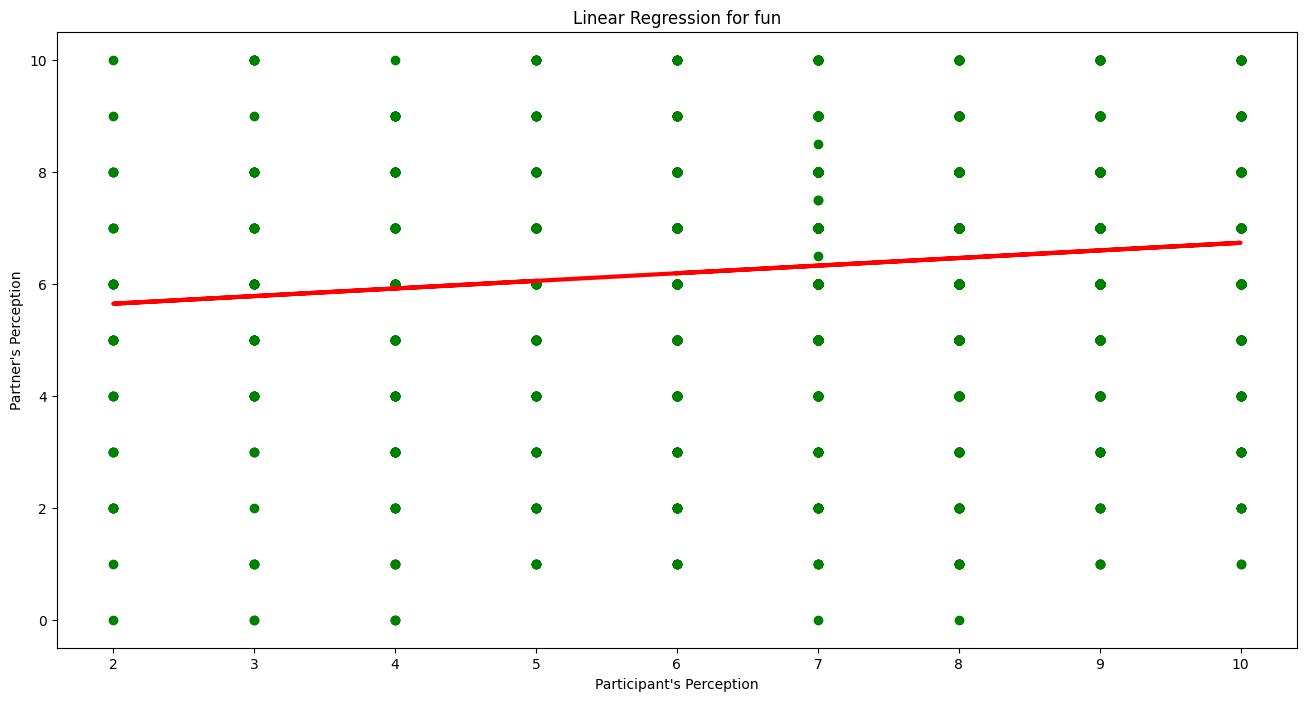

TRAIN SET:
Explained Variance (R^2) 	: 0.016075416649106278
Mean Squared Error (MSE) 	: 3.3843724034728377
Root Mean Squared Error （RMSE) 	: 1.8396663837426714
TEST SET:
Explained Variance (R^2) 	: 0.03662446102281891
Mean Squared Error (MSE) 	: 3.4265224040269757
Root Mean Squared Error （RMSE) 	: 1.8510868169880568
Linear Regression between participant's and their partner's perception on his/her: ambitious


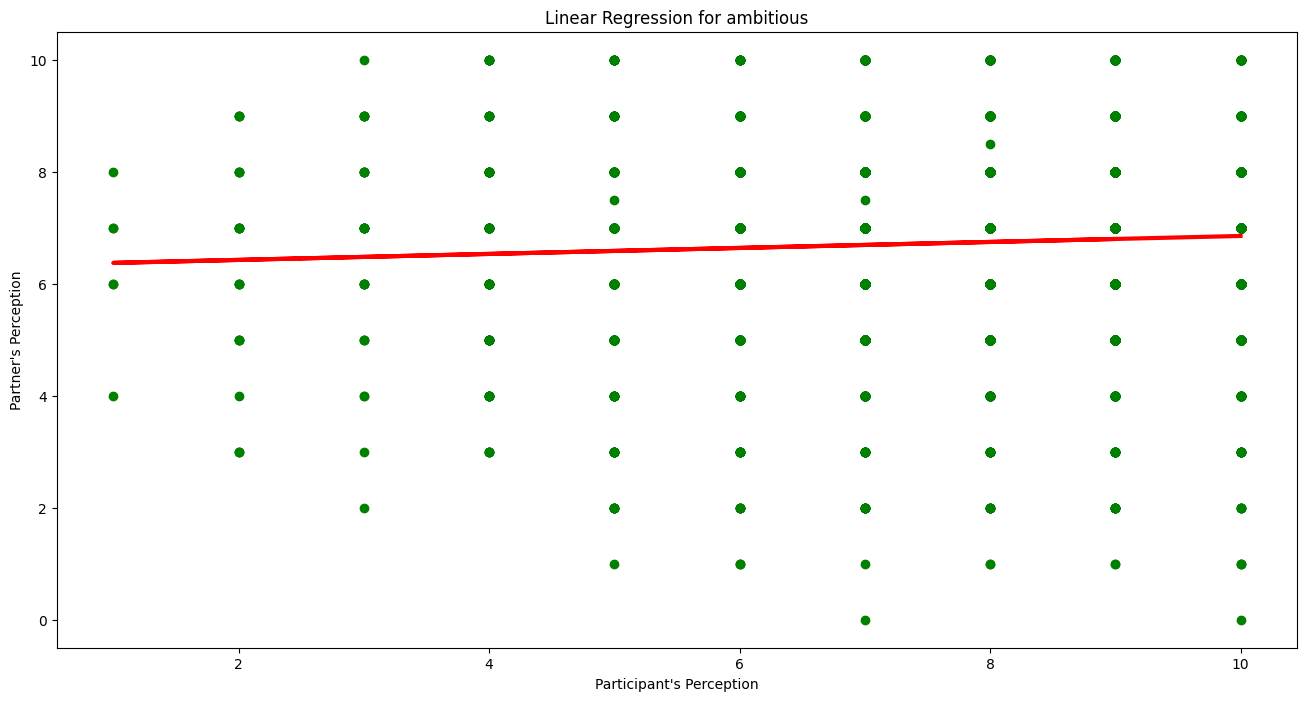

TRAIN SET:
Explained Variance (R^2) 	: 0.002757023476860021
Mean Squared Error (MSE) 	: 3.5351443232575814
Root Mean Squared Error （RMSE) 	: 1.880197947892078
TEST SET:
Explained Variance (R^2) 	: -0.0062773350604234945
Mean Squared Error (MSE) 	: 3.570167408833853
Root Mean Squared Error （RMSE) 	: 1.8894886633250418


In [34]:
# For code reusability, we will create a function that will take in the dataframe and the target variable and return the result of a linear regression model.
def linearTest(dataset_x, dataset_y, test_size, t):
    linear = LinearRegression()
    x_train, x_test, y_train, y_test = train_test_split(dataset_x, dataset_y, test_size=test_size)
    linear.fit(x_train, y_train)
    dataset_y_pred = linear.predict(dataset_x)
    y_train_pred = linear.predict(x_train)
    y_test_pred = linear.predict(x_test)
    f = plt.figure(figsize=(16,8))
    plt.scatter(dataset_x, dataset_y, color="green")
    plt.plot(dataset_x, dataset_y_pred, color="red", linewidth="3")
    plt.title("Linear Regression for "+str(t))
    plt.xlabel("Participant's Perception")
    plt.ylabel("Partner's Perception")
    plt.show()
    print("TRAIN SET:")
    print("Explained Variance (R^2) \t:", linear.score(x_train, y_train))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(x_train, y_train_pred))
    print("Root Mean Squared Error （RMSE) \t:", np.sqrt(mean_squared_error(x_train, y_train_pred)))
    
    print("TEST SET:")
    print("Explained Variance (R^2) \t:", linear.score(x_test, y_test))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(x_test, y_test_pred))
    print("Root Mean Squared Error （RMSE) \t:", np.sqrt(mean_squared_error(x_test, y_test_pred)))
    return linear

# Then, we run for each of the 5 variables (perception of attributes) 

for i in ['attr', 'sinc', 'intel', 'fun', 'amb']:
    print("Linear Regression between participant's and their partner's perception on his/her: " + {"attr": "attractive", "sinc":"sincere", "intel": "intelligence", "fun": "fun", "amb": "ambitious"}[i])
    linearTest(own_perception[i + '5_1'].values.reshape(-1, 1), partner_perception[i + '_o'].values.reshape(-1,1), 0.2, {"attr": "attractive", "sinc":"sincere", "intel": "intelligence", "fun": "fun", "amb": "ambitious"}[i]) # reshape(-1,1) is used to convert the data into a 2D array


##### From the linear regression results, though our own perceptions of the partner's view generally positively correlate with their actual views, we can see that our own perception is almost always bias with considerable estimating errors.
(Which means our estimation is often not accurate...)

### <a id="per-dec">How perceptions affect partner's willingness to date?</a>
In this part, we will find out how our partner's feeling affect their willingness for future dates, using Logistic Regressions.<br>
We will start by giving the logistic regressions for predicting partner's willingness based on each of the five perceptions.

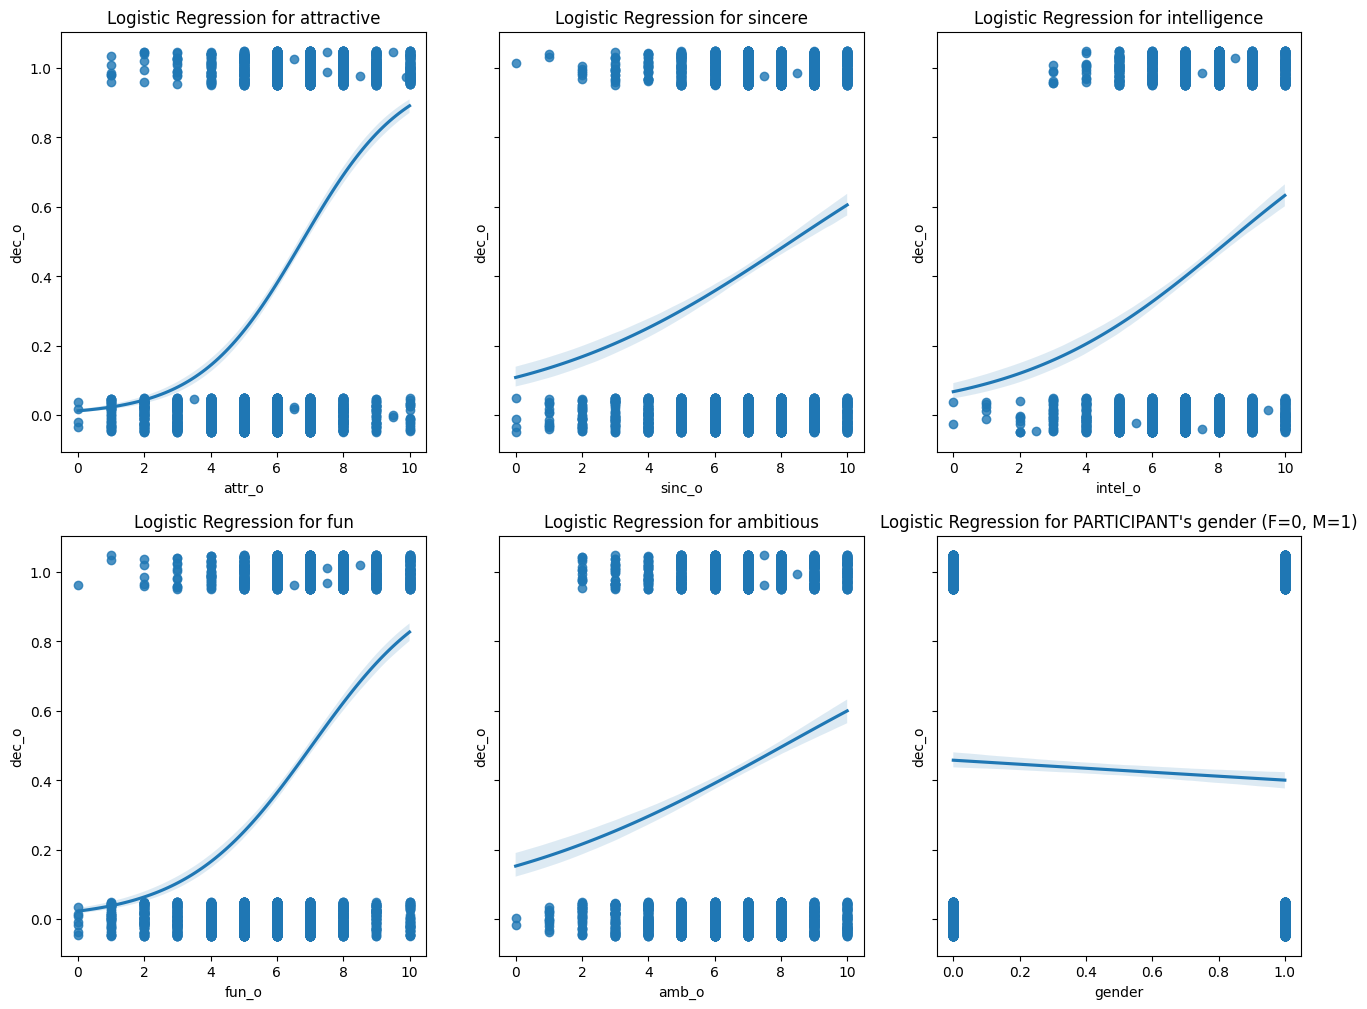

In [35]:
def logisticTest (axes, data_x, data_y, test_size=0.2, label=""):
    sns.regplot(ax=axes, x=data_x, y=data_y, logistic=True, y_jitter=0.05, label=label) # adding y_jitter to better show the density of data points
    axes.set_title("Logistic Regression for " + label)
    

fig, axes = plt.subplots(2, 3, figsize=(16, 12), sharey=True)
for j in range(5):
    i = ['attr', 'sinc', 'intel', 'fun', 'amb'][j]
    if j > 2:
        j = j - 3
        k = 1
    else:
        k = 0
    logisticTest(axes[k,j], partner_perception[i + '_o'], partner_dec, 0.2, {"attr": "attractive", "sinc":"sincere", "intel": "intelligence", "fun": "fun", "amb": "ambitious"}[i])
logisticTest(axes[1,2], gender, partner_dec, 0.2, "PARTICIPANT's gender (F=0, M=1)")
plt.show()

##### From the logistics regression results, we notice that partner's ratings on our participants significantly influence their choice to future dates.
Especially if the participants make their partner think they are attractive/fun.<br>
However, we don't usually make our decision from only one factor. <br>
Now, we will construct a logstics model with all five factors into consideration.

Accuracy of Logistic Regression for Train:  0.746875


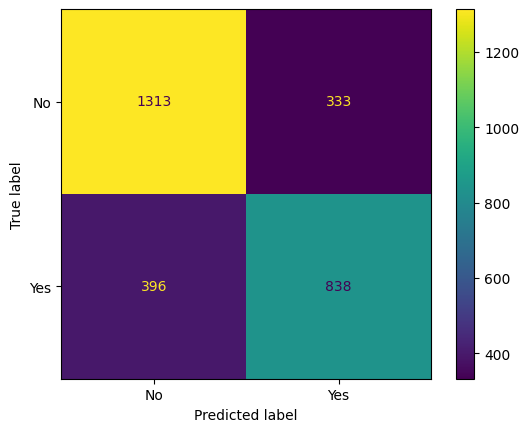

Accuracy of Logistic Regression for Test:  0.7305555555555555


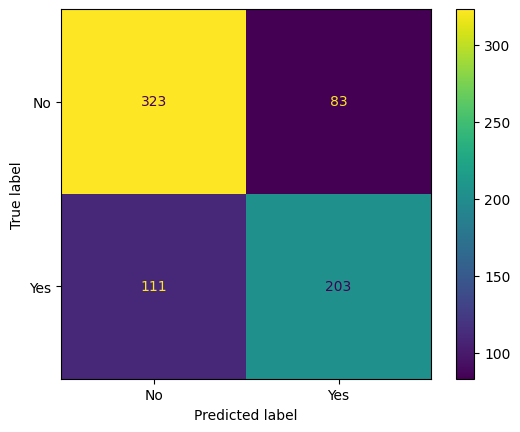

Classification Report for Logistic Regression (test_set): 
              precision    recall  f1-score   support

           0       0.74      0.80      0.77       406
           1       0.71      0.65      0.68       314

    accuracy                           0.73       720
   macro avg       0.73      0.72      0.72       720
weighted avg       0.73      0.73      0.73       720



In [36]:
logreg = LogisticRegression()
per_train, per_test, dec_train, dec_test = train_test_split(partner_perception, partner_dec, test_size=0.2)
logreg.fit(per_train, dec_train)
dec_pred = logreg.predict(per_test)
print("Accuracy of Logistic Regression for Train: ", logreg.score(per_train, dec_train))
ConfusionMatrixDisplay(confusion_matrix(dec_train, logreg.predict(per_train)), display_labels=["No", "Yes"]).plot()
plt.show()
print("Accuracy of Logistic Regression for Test: ", logreg.score(per_test, dec_test))
ConfusionMatrixDisplay(confusion_matrix(dec_test, dec_pred), display_labels=["No", "Yes"]).plot()
plt.show()
print("Classification Report for Logistic Regression (test_set): ")
print(classification_report(dec_test, dec_pred))


##### We have achieved an accuracy of around 75% for the logistic regression model between one's feeling & date decision.
How about the correlation between our participant's own feelings and their partner's decision?

### <a id="own-dec">Is it possible for us to tell the partner's decision with our feelings?</a>
Although participant's perceptions have weak linear relations with their partner's ones, they may still correlates with the decisions (e.g., the general good belief in all parts with partner's *YES*)<br>
In this part, we will find out how our feeling correlates to their willingness for future dates, using Logistic Regressions.<br>


Accuracy of Logistic Regression for Train:  0.5753472222222222


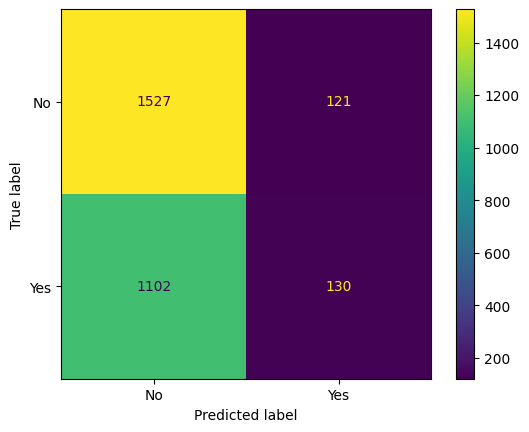

Accuracy of Logistic Regression for Test:  0.5583333333333333


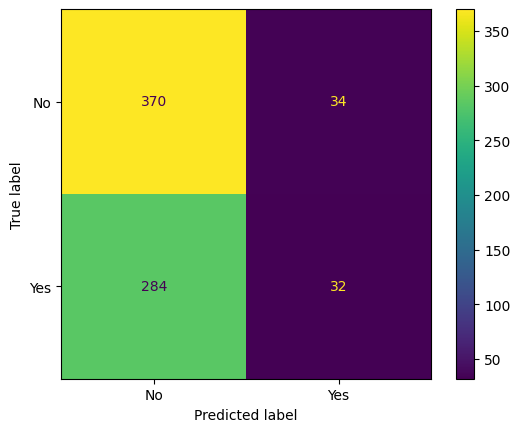

Classification Report for Logistic Regression (test_set): 
              precision    recall  f1-score   support

           0       0.57      0.92      0.70       404
           1       0.48      0.10      0.17       316

    accuracy                           0.56       720
   macro avg       0.53      0.51      0.43       720
weighted avg       0.53      0.56      0.47       720



In [37]:
logreg = LogisticRegression()
per_train, per_test, dec_train, dec_test = train_test_split(own_perception, partner_dec, test_size=0.2)
logreg.fit(per_train, dec_train)
dec_pred = logreg.predict(per_test)
print("Accuracy of Logistic Regression for Train: ", logreg.score(per_train, dec_train))
ConfusionMatrixDisplay(confusion_matrix(dec_train, logreg.predict(per_train)), display_labels=["No", "Yes"]).plot()
plt.show()
print("Accuracy of Logistic Regression for Test: ", logreg.score(per_test, dec_test))
ConfusionMatrixDisplay(confusion_matrix(dec_test, dec_pred), display_labels=["No", "Yes"]).plot()
plt.show()
print("Classification Report for Logistic Regression (test_set): ")
print(classification_report(dec_test, dec_pred))


##### For the logistics relation between one's own perception of his/her behavior and the partner's decision, the accuracy drops a lot.
The regression gives mainly Type-2 errors (False Negative), considering the information from earlier data visualization, participants generally don't feel they behaves good even if their partners actually agree on future dates, indicating their ratings on themselves are right-tailed, generally less confident.

### <a id="nn-per-dec">Neural Network Regression predicting decision based on partner's ratings</a>
As human's actual decision process is much more complicated than a logistic model, we decide to use neural network algorithms to better predict the partner's decision.

https://machinelearningmastery.com/building-a-regression-model-in-pytorch/

Epoch:  0
Epoch:  100
Epoch:  200
Epoch:  300
Epoch:  400
Epoch:  500
Epoch:  600
Epoch:  700
Epoch:  800
Epoch:  900
MSE: 0.18
RMSE: 0.42


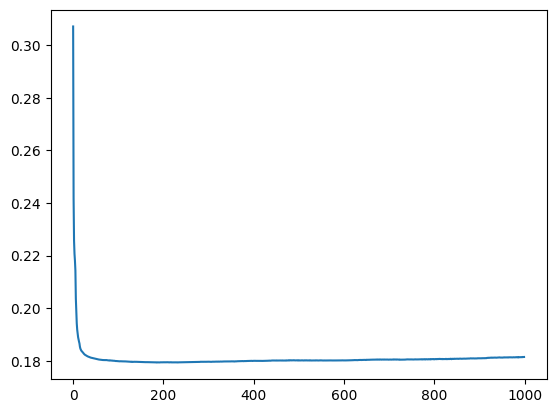

In [50]:
import torch.nn as nn
import torch.optim as optim
import tqdm
import torch
import copy
xtrain, xtest, ytrain, ytest = train_test_split(pd.concat([partner_perception, gender], axis=1), partner_dec, test_size=0.2)

# Convert to tensors
xtrain = torch.tensor(xtrain.values, dtype=torch.float32)
xtest = torch.tensor(xtest.values, dtype=torch.float32)
ytrain = torch.tensor(ytrain.values, dtype=torch.float32).reshape(-1, 1)
ytest = torch.tensor(ytest.values, dtype=torch.float32).reshape(-1, 1)

# Model
nnmodel = nn.Sequential(
    nn.Linear(6, 24),
    nn.ReLU(),
    nn.Linear(24, 12),
    nn.ReLU(),
    nn.Linear(12, 6),
    nn.ReLU(),
    nn.Linear(6, 1),
)

loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(nnmodel.parameters(), lr=0.0001)
epochs = 1000
batch_size = 32
batch_start = torch.arange(0, len(xtrain), batch_size)

best_mse = np.inf
best_weights = None
history = []
for epoch in range(epochs):
    if epoch % 100 == 0:
        print("Epoch: ", epoch)
    nnmodel.train()
    with tqdm.tqdm(batch_start, unit="batch", mininterval=0, disable=True) as bar:
        bar.set_description(f"Epoch {epoch}")
        for start in bar:
            # take a batch
            X_batch = xtrain[start:start+batch_size]
            y_batch = ytrain[start:start+batch_size]
            # forward pass
            y_pred = nnmodel(X_batch)
            loss = loss_fn(y_pred, y_batch)
            # backward pass
            optimizer.zero_grad()
            loss.backward()
            # update weights
            optimizer.step()
            # print progress
            bar.set_postfix(mse=float(loss))
    # evaluate accuracy at end of each epoch
    nnmodel.eval()
    y_pred = nnmodel(xtest)
    mse = loss_fn(y_pred, ytest)
    mse = float(mse)
    history.append(mse)
    if mse < best_mse:
        best_mse = mse
        best_weights = copy.deepcopy(nnmodel.state_dict())

nnmodel.load_state_dict(best_weights)
print("MSE: %.2f" % best_mse)
print("RMSE: %.2f" % np.sqrt(best_mse))
plt.plot(history)
plt.show()

This graph shows how the neural network's MSE decreases over time.

Accuracy of Neural Network for Test:  0.7447916666666666


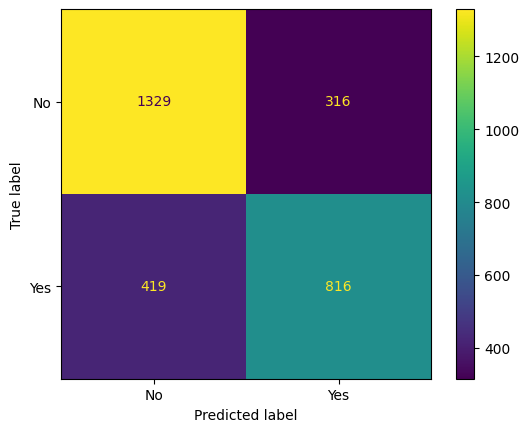

Accuracy of Neural Network for Test:  0.7236111111111111


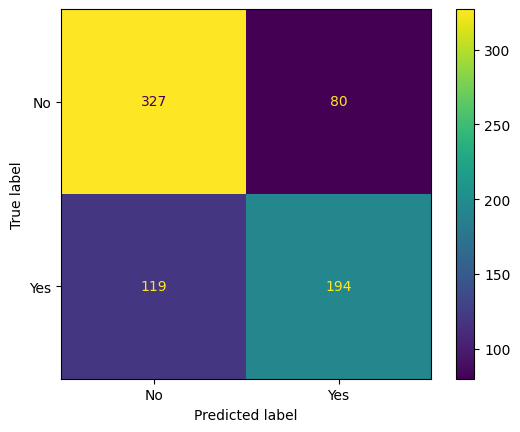

In [56]:
ypred = nnmodel(xtrain)
ypred_df = pd.DataFrame(ypred.detach().numpy())
ytrain_df = pd.DataFrame(ytrain.detach().numpy())
ypred_df = ypred_df.loc[:,0].apply(lambda x: 1 if x > 0.5 else 0)
print("Accuracy of Neural Network for Test: ", accuracy_score(ytrain_df, ypred_df))
ConfusionMatrixDisplay(confusion_matrix(ytrain_df, ypred_df), display_labels=["No", "Yes"]).plot()
plt.show()

ypred = nnmodel(xtest)
ypred_df = pd.DataFrame(ypred.detach().numpy())
ytest_df = pd.DataFrame(ytest.detach().numpy())
ypred_df = ypred_df.loc[:,0].apply(lambda x: 1 if x > 0.5 else 0)
print("Accuracy of Neural Network for Test: ", accuracy_score(ytest_df, ypred_df))
ConfusionMatrixDisplay(confusion_matrix(ytest_df, ypred_df), display_labels=["No", "Yes"]).plot()
plt.show()

Epoch:  0
Epoch:  100
Epoch:  200
Epoch:  300
Epoch:  400
Epoch:  500
Epoch:  600
Epoch:  700
Epoch:  800
Epoch:  900
MSE: 0.23
RMSE: 0.48


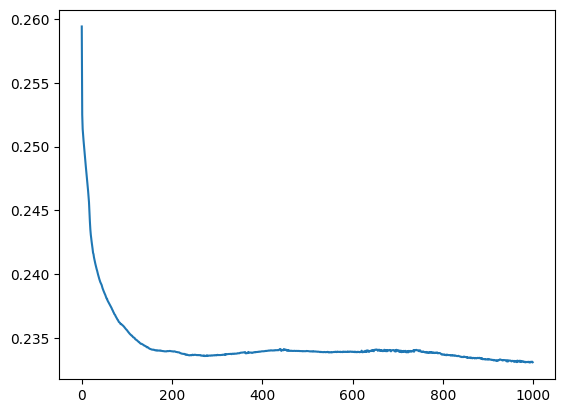

In [57]:
xtrain, xtest, ytrain, ytest = train_test_split(pd.concat([own_perception, gender], axis=1), partner_dec, test_size=0.2)

# Convert to tensors
xtrain = torch.tensor(xtrain.values, dtype=torch.float32)
xtest = torch.tensor(xtest.values, dtype=torch.float32)
ytrain = torch.tensor(ytrain.values, dtype=torch.float32).reshape(-1, 1)
ytest = torch.tensor(ytest.values, dtype=torch.float32).reshape(-1, 1)

# Model
nnmodel = nn.Sequential(
    nn.Linear(6, 24),
    nn.ReLU(),
    nn.Linear(24, 12),
    nn.ReLU(),
    nn.Linear(12, 6),
    nn.ReLU(),
    nn.Linear(6, 1),
)

loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(nnmodel.parameters(), lr=0.0001)
epochs = 1000
batch_size = 128
batch_start = torch.arange(0, len(xtrain), batch_size)

best_mse = np.inf
best_weights = None
history = []
for epoch in range(epochs):
    if epoch % 100 == 0:
        print("Epoch: ", epoch)
    nnmodel.train()
    with tqdm.tqdm(batch_start, unit="batch", mininterval=0, disable=True) as bar:
        bar.set_description(f"Epoch {epoch}")
        for start in bar:
            # take a batch
            X_batch = xtrain[start:start+batch_size]
            y_batch = ytrain[start:start+batch_size]
            # forward pass
            y_pred = nnmodel(X_batch)
            loss = loss_fn(y_pred, y_batch)
            # backward pass
            optimizer.zero_grad()
            loss.backward()
            # update weights
            optimizer.step()
            # print progress
            bar.set_postfix(mse=float(loss))
    # evaluate accuracy at end of each epoch
    nnmodel.eval()
    y_pred = nnmodel(xtest)
    mse = loss_fn(y_pred, ytest)
    mse = float(mse)
    history.append(mse)
    if mse < best_mse:
        best_mse = mse
        best_weights = copy.deepcopy(nnmodel.state_dict())

nnmodel.load_state_dict(best_weights)
print("MSE: %.2f" % best_mse)
print("RMSE: %.2f" % np.sqrt(best_mse))
plt.plot(history)
plt.show()

Accuracy of Neural Network for Test:  0.6038194444444445


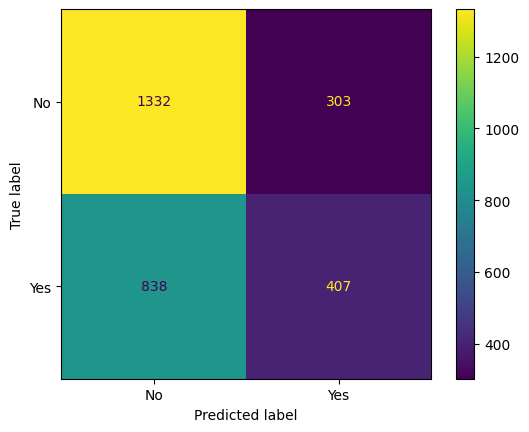

Accuracy of Neural Network for Test:  0.5861111111111111


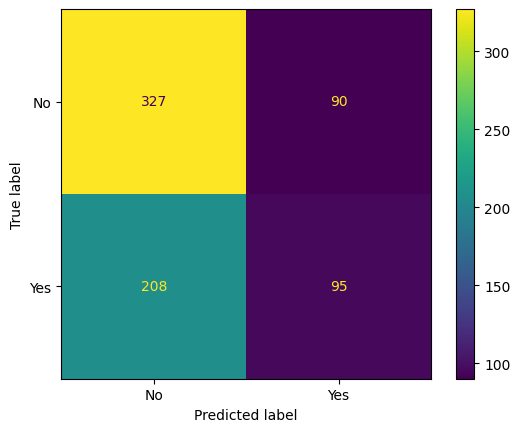

In [58]:
ypred = nnmodel(xtrain)
ypred_df = pd.DataFrame(ypred.detach().numpy())
ytrain_df = pd.DataFrame(ytrain.detach().numpy())
ypred_df = ypred_df.loc[:,0].apply(lambda x: 1 if x > 0.5 else 0)
print("Accuracy of Neural Network for Test: ", accuracy_score(ytrain_df, ypred_df))
ConfusionMatrixDisplay(confusion_matrix(ytrain_df, ypred_df), display_labels=["No", "Yes"]).plot()
plt.show()

ypred = nnmodel(xtest)
ypred_df = pd.DataFrame(ypred.detach().numpy())
ytest_df = pd.DataFrame(ytest.detach().numpy())
ypred_df = ypred_df.loc[:,0].apply(lambda x: 1 if x > 0.5 else 0)
print("Accuracy of Neural Network for Test: ", accuracy_score(ytest_df, ypred_df))
ConfusionMatrixDisplay(confusion_matrix(ytest_df, ypred_df), display_labels=["No", "Yes"]).plot()
plt.show()